# Analisis de Datos Financieros con Yahoo Finanzas

## Preparacion de los datos

Importamos las librerias que utilizaremos

In [7]:
import pandas as pd
import yfinance as yf
#from yahoofinancials import YahooFinancials

Creamos una funcion generica que utilizaremos para descargar los datos de las distintas empresas

In [8]:
def df(name:str):
    return yf.download(name, 
                start="2014-01-01", 
                progress=False,
)

Importaremos los datos de Amazon, Netflix, IBM y SP500

In [9]:
df_amazon = df("AMZN")
df_netflix = df("NFLX")
df_ibm = df("IBM")
df_sp500 = df("SPY")

Solo utilizaremos las ultimas dos columnas (Precios de Cierre y Volúmenes)

In [10]:
df_amazon = df_amazon.iloc[:,[4,5]]
df_netflix = df_netflix.iloc[:,[4,5]]
df_ibm = df_ibm.iloc[:,[4,5]]
df_sp500 = df_sp500.iloc[:,[4,5]]

df_amazon

,Adj Close,Volume
Date,,
2014-01-02,19.898500,42756000
2014-01-03,19.822001,44204000
2014-01-06,19.681499,63412000
2014-01-07,19.901501,38320000
2014-01-08,20.096001,46330000
...,...,...
2023-04-18,102.300003,39790500
2023-04-19,104.300003,58398900
2023-04-20,103.809998,57696900


Unimos las 4 empresas en un solo dataset y renombramos las columnas

In [11]:
columns = []
for x in ["AMZN ", "NFLX ", "IBM ", "SPY "]:
    for y in range(2):
        columns.append(x+df_amazon.columns[y])
datas = [df_amazon["Adj Close"],df_amazon["Volume"],df_netflix["Adj Close"],df_netflix["Volume"],df_ibm["Adj Close"],df_ibm["Volume"],df_sp500["Adj Close"],df_sp500["Volume"]]
df_yahoo = pd.DataFrame()
for i in range(len(columns)):
    df_yahoo[columns[i]] = datas[i]

Comprobamos el nuevo DataFrame y lo guardamos para no tener que descargar los datos nuevamente

In [12]:
print(df_yahoo)

import csv

df_yahoo.to_csv('df_yahoo.csv', sep=",")

            AMZN Adj Close  AMZN Volume  NFLX Adj Close  NFLX Volume   
Date                                                                   
2014-01-02       19.898500     42756000       51.831429     12325600  \
2014-01-03       19.822001     44204000       51.871429     10817100   
2014-01-06       19.681499     63412000       51.367142     15501500   
2014-01-07       19.901501     38320000       48.500000     36167600   
2014-01-08       20.096001     46330000       48.712856     20001100   
...                    ...          ...             ...          ...   
2023-04-18      102.300003     39790500      333.700012     17944500   
2023-04-19      104.300003     58398900      323.119995     22128300   
2023-04-20      103.809998     57696900      325.350006      9947800   
2023-04-21      106.959999     86689700      327.980011      6342600   
2023-04-24      106.209999     69513400      329.019989      5578500   

            IBM Adj Close  IBM Volume  SPY Adj Close  SPY Volum

Graficamos la serie de tiempo de los precios, pero primero importamos y ajustamos los parametros del modulo

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

In [35]:
def serie_temporal():
    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar las dos variables simultáneas
    ax.plot(df_yahoo.index, df_yahoo["AMZN Adj Close"], label='Amazon')
    ax.plot(df_yahoo.index, df_yahoo["NFLX Adj Close"], label='Netflix')
    ax.plot(df_yahoo.index, df_yahoo["IBM Adj Close"], label='IBM')
    ax.plot(df_yahoo.index, df_yahoo["SPY Adj Close"], label='Standar&Poors')

    # Agregar etiquetas de los ejes y el título
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Valor')
    ax.set_title('Evolucion del precio')

    # Agregar una leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.show()

"""def grafico_serie_temporal(df, variables:list, xlabel, ylabel, title, fig_size=(10,6)):
    \"""
    Esta función genera un gráfico de series de tiempo en Matplotlib con n cantidad de variables.

    Parameters:
        - df: DataFrame de pandas con los datos.
        - variables: Lista de nombres de columnas correspondientes a las variables.
        - xlabel: Etiqueta del eje x.
        - ylabel: Etiqueta del eje y.
        - title: Título del gráfico.
        - figsize: Tamaño de la figura. Por defecto es (10,6).

    Returns:
        - None
    \"""

    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=fig_size)

    # Graficar las variables simultáneas
    for variable in variables:
        ax.plot(df.index, df[variable], label=variable)

    # Agregar etiquetas de los ejes y el título
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Agregar una leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.show()
"""

Ahora si generamos el grafico

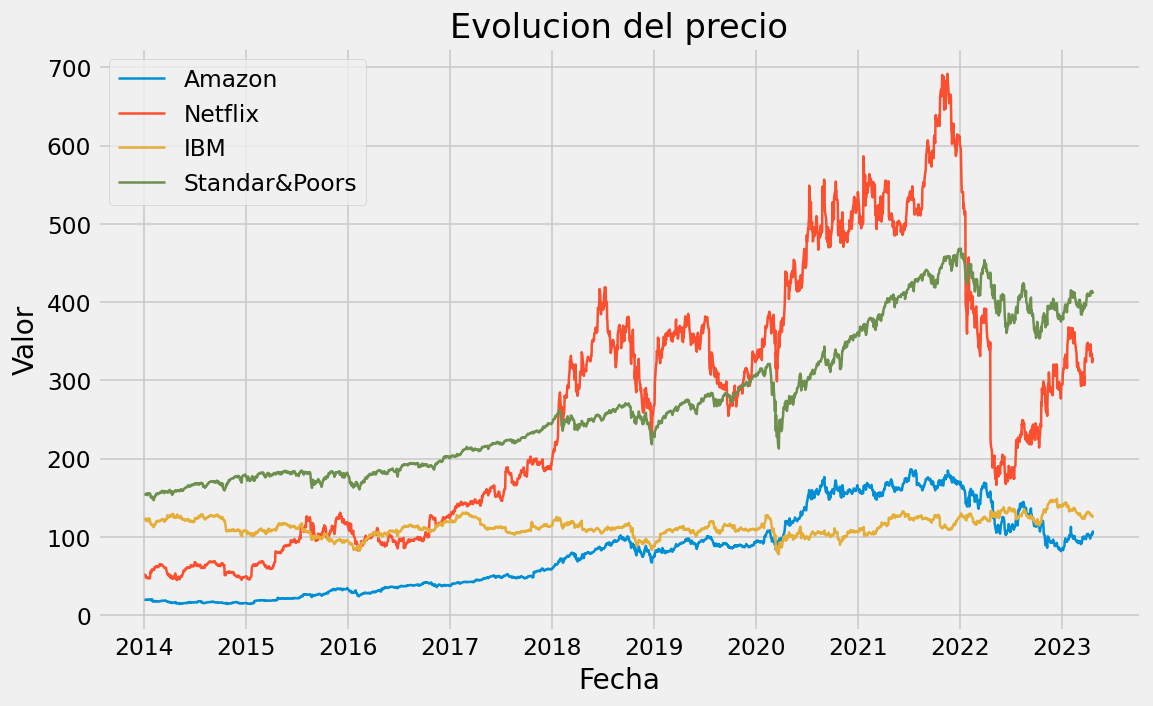

In [37]:
#grafico_serie_temporal(df_yahoo, ["AMZN Adj Close","NFLX Adj Close","IBM Adj Close","SPY Adj Close"],
#                       "Fecha", "Precio", "Evolucion del Precio")

serie_temporal()